# Laboratorium 6

In [2]:
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

In [3]:
def density(x):
    return np.exp(- x**2 / 2) 

def metropolis_hastings(delta, size):
    x = [0.0] * size
    rv = uniform(-delta, 2*delta)
    rv01 = uniform(0, 1)
    for i in range(1, len(x)):
        proposed = rv.rvs() + x[i-1]
        alfa = density(proposed) / density(x[i-1])
        if rv01.rvs() < alfa:
            x[i] = proposed
        else:
            x[i] = x[i-1]
    return x

def generate_random_dist(delta, size=10000):
    x = metropolis_hastings(delta, size)
    plt.hist(x, bins=40, density=True, label='sample histogram')
    x1 = np.arange(-3, 3, 0.1)
    plt.plot(x1, norm(0, 1).pdf(x1), label='normal density')
    plt.title(f'Hastings-Metropolis algorithm with $\delta = {delta}$')
    plt.legend()
    plt.show()

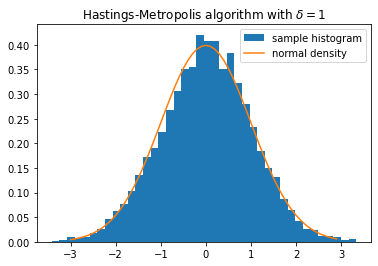

In [4]:
generate_random_dist(1)

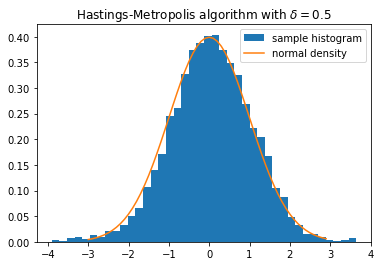

In [5]:
generate_random_dist(0.5)

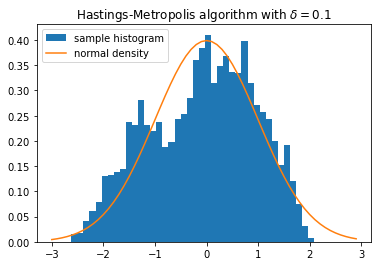

In [6]:
generate_random_dist(0.1)

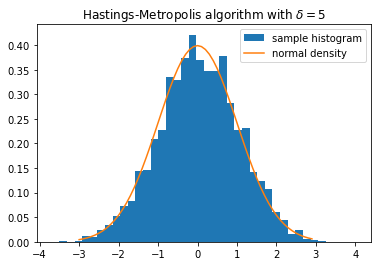

In [7]:
generate_random_dist(5)

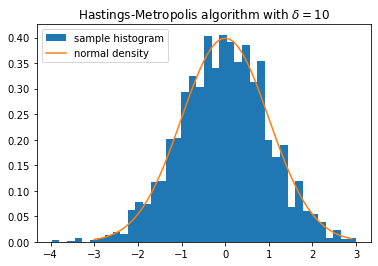

In [8]:
generate_random_dist(10)

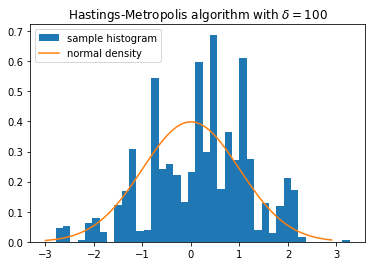

In [9]:
generate_random_dist(100)

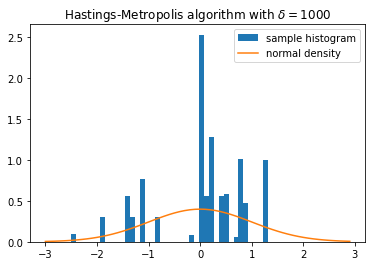

In [10]:
generate_random_dist(1000)

Widać, że przy dużych deltach `acceptance rate` jest bardzo mały, bo gęstość rozkładu normalnego szybko maleje przy dążeniu do $\infty$ lub $-\infty$. Przez to algorytm często utyka w pojedynczych wartościach. Podobnie zbyt małe delty nie są korzystne dla tego algorytmu, ponieważ wtedy wartość proponowana(`proposed`) jest zawsze blisko wartości poprzedniej, czyli `acceptance rate` jest bliski 1 i mamy błądzenie losowe. Najlepiej wypadają delty bliskie 1, ale oczywiście ciągi generowane w ten sposób nie dadzą zmiennych niezależnych, bo obliczenie `x[i]` jest związane z wartością `x[i-1]`.

In [11]:
def metropolis_hastings_acceptance(delta, size=1000):
    x = [0.0] * size
    acceptance = 0.0
    rv = uniform(-delta, 2*delta)
    rv01 = uniform(0, 1)
    for i in range(1, len(x)):
        proposed = rv.rvs() + x[i-1]
        alfa = density(proposed) / density(x[i-1])
        acceptance += alfa
        if rv01.rvs() < alfa:
            x[i] = proposed
        else:
            x[i] = x[i-1]
    return acceptance/(size - 1)

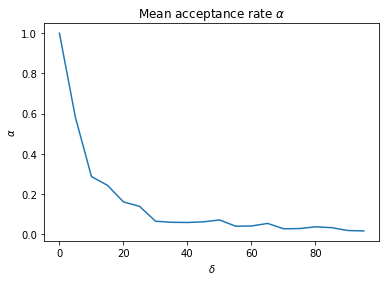

In [12]:
x = np.arange(0.1, 100, 5)
acceptance_rates = [0] * len(x)
for i in range(len(x)):
    acceptance_rates[i] = metropolis_hastings_acceptance(x[i])
plt.plot(x, acceptance_rates)
plt.title(r'Mean acceptance rate $\alpha$')
plt.xlabel('$\delta$')
plt.ylabel(r'$\alpha$')
plt.show()

# faktycznie acceptance rate maleje ze wzrostem \delta